## TASK

Perfrorm **exploratory data analysis** over the given dataset. Take 3-5 features for a detailed analysis.

Link to the dataset and dataset description: https://archive.ics.uci.edu/ml/datasets/bank+marketing 

### INTRODUCTION

The dataset was obtained through a study on the success of telemarketing calls for selling long-term bank deposits. The data was taken from a Portugese bank during 6 consequent years (2008-2013) capturing the financial crisis. The present dataset with 22 features is a reduced one compared to the original dataset of 150 features. 

At the time of the study, contacting potential customers via telephone was one of the core marketing channels. Therefore, correctly assessing the success of this major channel was crucial for the marketing management.

This problem is solvable with the help of data science techniques since the success can be tracked and measured as well as most of the relevant features of customer data and other factors. 

## IMPORTS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sklearn as sk

import pandas_profiling

from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

C:\Users\1\AppData\Local\Temp/ipykernel_9160/1388804693.py:23: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [3]:
# loading the dataset
df_train = pd.read_csv(r'C:\Users\1\Desktop\epam-hw-main\EDA Dataset\bank.csv', sep=';')

## EXPLORATORY DATA ANALYSIS

### General Overview of the Dataset

In [4]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
# general overview of the variables
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
# detailed overview of the data
pandas_profiling.ProfileReport(df=df_train)

TypeError: concat() got an unexpected keyword argument 'join_axes'

**Report summary:**
- No missing values
- No duplicates
- 7 numeric and 10 categorical features
- Most numerical features display skewed distributions
- Binary target variable (whether or not the observed client subscribed a term deposit)
- Dataset is imbalanced in relation to the target (89% not subscribed, 11% subscribed)

In [7]:
# grouping the features
numerical_features = df_train.select_dtypes('number').columns
categorical_features = df_train.select_dtypes('object').drop('y',axis=1).columns

In [8]:
df_train[numerical_features].describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
df_train[categorical_features].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome
count,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4
top,management,married,secondary,no,yes,no,cellular,may,unknown
freq,969,2797,2306,4445,2559,3830,2896,1398,3705


### Analysis of the Target

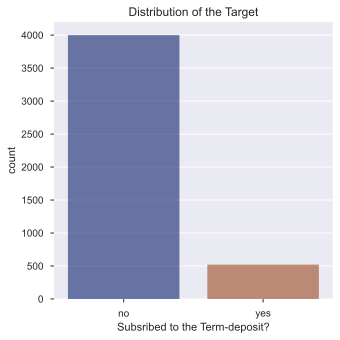

In [10]:
# distribution plot
plt.figure(figsize=(5, 5))

ax = sns.countplot(x='y', 
                   data=df_train,
                  palette='dark',
                  alpha=.6)

ax.set_xlabel('Subsribed to the Term-deposit?')
ax.set_title("Distribution of the Target")
plt.show();

It is again seen that the dataset is imbalanced. 
This might require resampling when building machine learning models for the dataset.

## Analysis of the Explanaroty Variables

Preliminary analysis of the explanatory variables is required to understand the distribution of the variables, detect non-typical values, check preliminary hypotheses. Bivariate analysis with the target variable is used to detect the magnitude of potential effects.   

### `age` of the customer (numerical - continuous)

The minimum age of the contacted clients was 17 years. The maximum one was 98. This gives a very wide range of the age groups, but it makes sense to see which ones of them were the most frequent.

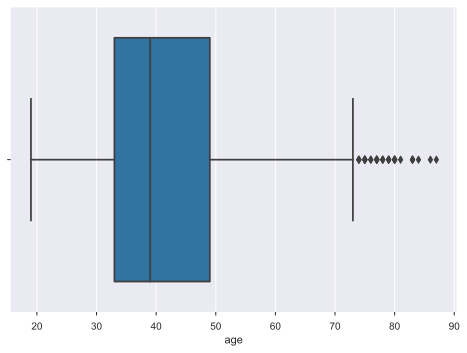

In [11]:
sns.boxplot(x=df_train['age']);

From the boxplot, we can see that contacted customers older than 73 are rather exceptions, and that >70% of the customers are in the age range of 17-69.

Let's see whether any age group is more prone to subscribing to the deposit.

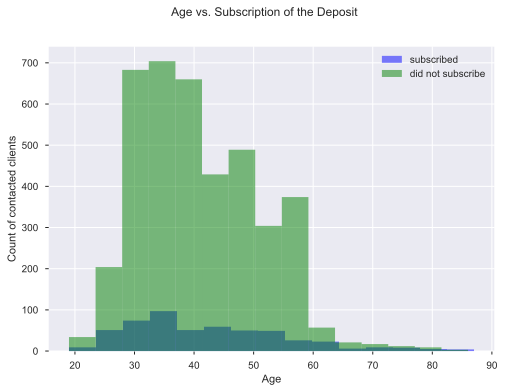

In [12]:
#histograms
fig, ax = plt.subplots()

ax.hist(df_train[df_train["y"]=="yes"]["age"], bins=15, alpha=0.5, color="blue", label="subscribed")
ax.hist(df_train[df_train["y"]=='no']["age"], bins=15, alpha=0.5, color="green", label="did not subscribe")

ax.set_xlabel("Age")
ax.set_ylabel("Count of contacted clients")

fig.suptitle("Age vs. Subscription of the Deposit")

ax.legend();

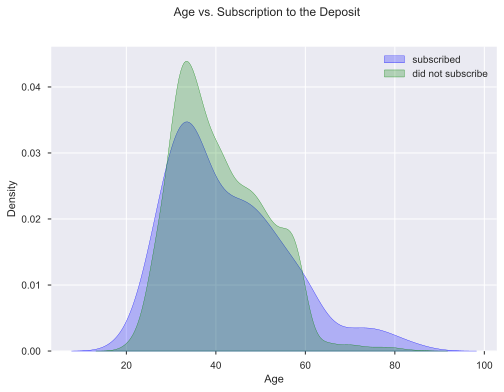

In [13]:
#kdensity plots
fig, ax = plt.subplots()

sns.kdeplot(df_train[df_train["y"]=='yes']["age"], shade=True, color="blue", label="subscribed", ax=ax)
sns.kdeplot(df_train[df_train["y"]=='no']["age"], shade=True, color="green", label="did not subscribe", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs. Subscription to the Deposit");

ax.legend();

While a small difference is noticed with a larger proportion of older people subsribing to the deposit, it is too early to conclude that only visually. Further analysis is required.

In [14]:
sp.stats.ks_2samp(
    df_train[df_train.y == 'no'][numerical_features[0]],
    df_train[df_train.y == 'yes'][numerical_features[0]]
)

KstestResult(statistic=0.08626823416506718, pvalue=0.0019524409959810196)

The p-value of Kolmogorov-Smirnov test is significantly small for even 1% alpha-level, which allows us to reject the null hypothesis that these samples were taken from the same distribution.

Let's take a look at how the average values in customer groups correlate with a positive and negative answer:

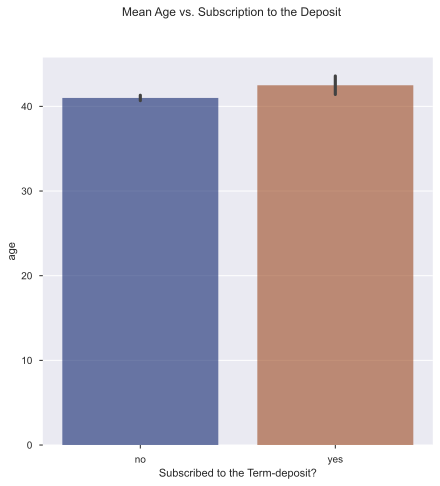

In [15]:
plt.figure(figsize=(7, 7))
sns.barplot(x='y', 
            y=numerical_features[0], 
            data=df_train,
           palette='dark',
           alpha=.6)

plt.xlabel('Subscribed to the Term-deposit?')
plt.suptitle("Mean Age vs. Subscription to the Deposit");
plt.show()

In [16]:
# finding the median age value of people not subscribed
df_train[df_train.y == 'no'][numerical_features[0]].median()

39.0

In [17]:
# finding the median age value of people subscribed
df_train[df_train.y == 'yes'][numerical_features[0]].median()

40.0

We can also compare box-plots:

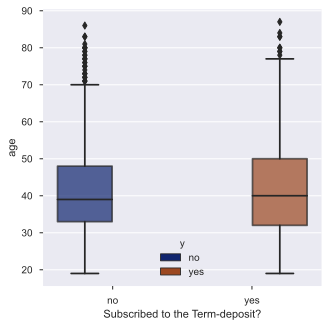

In [18]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='y', 
            y=numerical_features[0], 
            hue='y', 
            data=df_train,
           palette='dark',
           boxprops=dict(alpha=.7))

plt.xlabel('Subscribed to the Term-deposit?')
plt.show();

Box-plots also do not show any significant displacement of one distribution relative to another.

It is evident that the second group has a flatter right tail which goes in hand with the average value in this group being higher.

### `job` of the customer (categorical - nominal)

We can see that a disproportionate number of clients come from 3 major job categories: management, blue-collar and technician. 


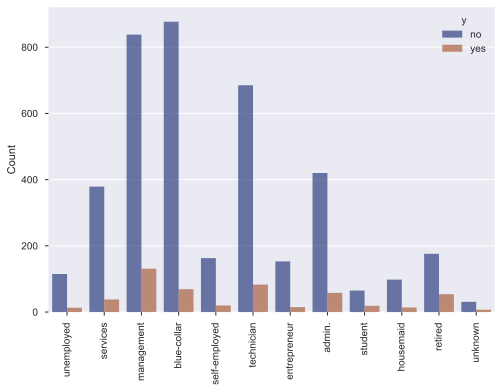

In [19]:
g = sns.countplot(
    data=df_train, 
    x='job', 
    hue='y', 
    palette="dark", 
    alpha=.6
)

g.set_xlabel("")
g.set_ylabel("Count")

plt.xticks(rotation=90);

Job categories with the largest *proportion* of successful long-term debt subscription are students and retired — economic agents presumably without active income.  

### `default` (categorical - nominal)

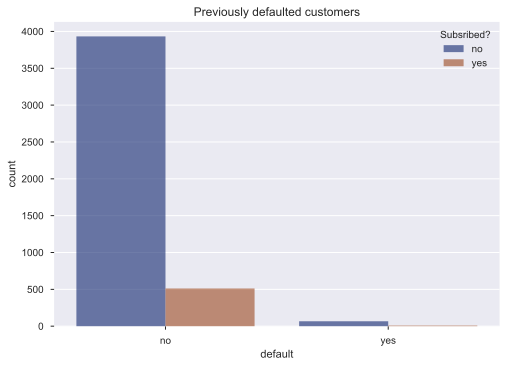

In [20]:
g = sns.countplot(data=df_train,
                  x='default',
                 hue='y',
                 palette='dark',
                 alpha=.6)

g.legend(title='Subsribed?')
g.set_title('Previously defaulted customers');

In [21]:
df_train[df_train['default']=='no']['y'].value_counts(True)

no     0.884814
yes    0.115186
Name: y, dtype: float64

In [22]:
df_train[df_train['default']=='yes']['y'].value_counts(True)

no     0.881579
yes    0.118421
Name: y, dtype: float64

The proportion of subscriptions is essentially the same across both defaulted and non-defaulted customers.

### `loan` (categorical - nominal)

In [23]:
df_train.loan.value_counts()

no     3830
yes     691
Name: loan, dtype: int64

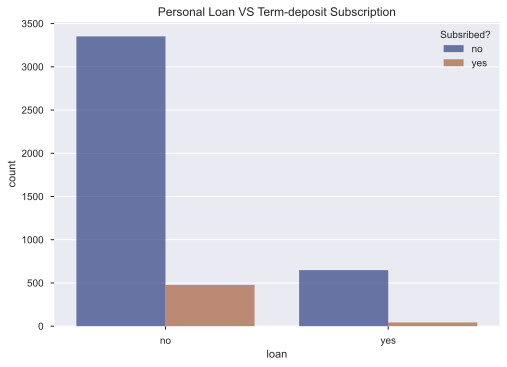

In [24]:
g = sns.countplot(data=df_train,
                  x='loan',
                 hue='y',
                 palette='dark',
                 alpha=.6)

g.legend(title='Subsribed?')
g.set_title('Personal Loan VS Term-deposit Subscription');

In [25]:
df_train[df_train['loan']=='no']['y'].value_counts(True)

no     0.875196
yes    0.124804
Name: y, dtype: float64

In [26]:
df_train[df_train['loan']=='yes']['y'].value_counts(True)

no     0.937771
yes    0.062229
Name: y, dtype: float64

The proportion of customers subscribed to a term-deposit is higher among those who didn't possess a personal loan. 


### `month` (categorical - nominal)

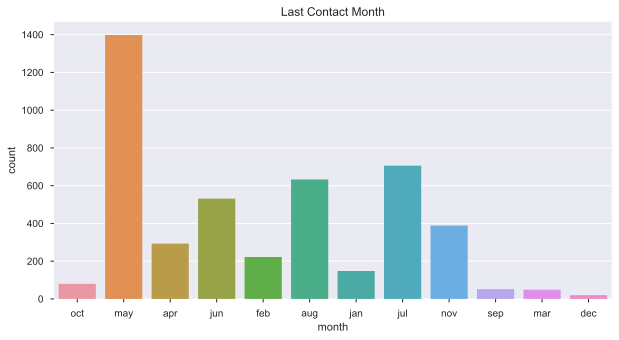

In [27]:
plt.figure(figsize = (10,5))

g = sns.countplot(x=df_train['month'])

g.set_title('Last Contact Month');

It is interesting to note that a disproportional number of contacts was conducted in May, while such months as December, March, September and October were the quietest.   

### `contact` contact communication type (categorical - nominal)

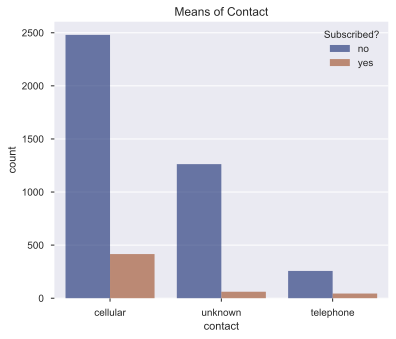

In [28]:
plt.figure(figsize=(6,5))

g = sns.countplot(data=df_train,
                  x=df_train['contact'],
                 hue=df_train['y'],
                 palette='dark',
                 alpha=0.6)

g.legend(title='Subscribed?', )
g.set_title('Means of Contact');

In [29]:
df_train['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [30]:
for type in df_train['contact'].unique():
    i = df_train[df_train['contact']==type]['y'].value_counts(True)
    print('When contacted by ', type, '\n', i, '\n')

When contacted by  cellular 
 no     0.856354
yes    0.143646
Name: y, dtype: float64 

When contacted by  unknown 
 no     0.953927
yes    0.046073
Name: y, dtype: float64 

When contacted by  telephone 
 no     0.853821
yes    0.146179
Name: y, dtype: float64 



We see there is no significant difference between cellular and telephone contacts with respect to the outcome of the call. 

### `poutcome` outcome of the previous marketing campaign (categorical - nominal)

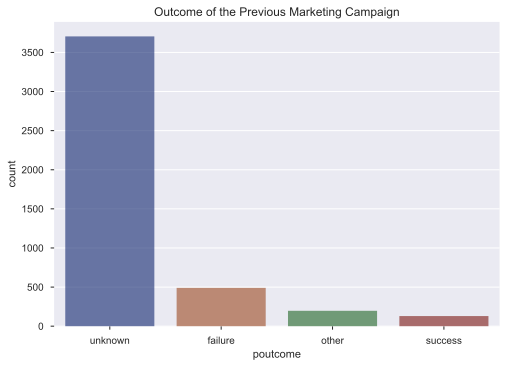

In [31]:
g = sns.countplot(x=df_train['poutcome'],
                 palette='dark',
                 alpha=0.6)

g.set_title('Outcome of the Previous Marketing Campaign');

From the dataset description, we know that 'other' means non-existent, i.e. that a person has either not been contacted during the previous campaign or there is no record of the last campaign result. What distinguishes it from 'unknown' is that the latter category reflects that the results of the previous campaign were not checked for the customer. It might be useful to delete this predictor later to avoid any distortion of information because of the 'unknown' category which might potentially include the other 3 categories in arbitrary proportions.

### `duration` of the call (numerical - continuous) 

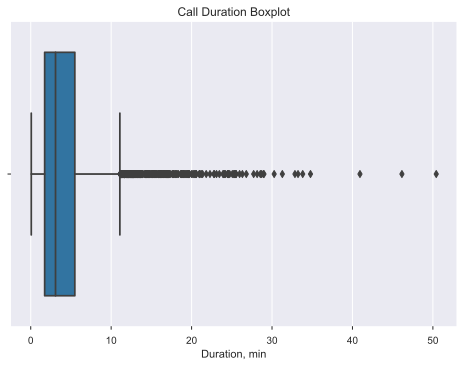

In [32]:
g = sns.boxplot(x=df_train['duration']/60)

g.set_xlabel('Duration, min')
g.set_title('Call Duration Boxplot');

We can see that most of the calls lasted less than 10-15 minutes with some exceptional cases of close to 30-60 mins. 

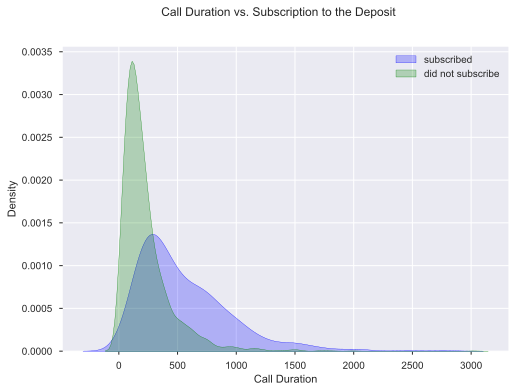

In [33]:
fig, ax = plt.subplots()

sns.kdeplot(df_train[df_train["y"]=='yes']["duration"], shade=True, color="blue", label="subscribed", ax=ax)
sns.kdeplot(df_train[df_train["y"]=='no']["duration"], shade=True, color="green", label="did not subscribe", ax=ax)

ax.set_xlabel("Call Duration")
ax.set_ylabel("Density")

ax.legend()

fig.suptitle("Call Duration vs. Subscription to the Deposit");

As expected, longer call durations correspond with the successful subscription. This might be due to the fact that interested clients have more questions and therefore longer discussions. On the other hand, one could think that more persuasive employees use the time to influence the client's decision. As with the other variables in the EDA step, it is impossible to conclude anything about the causal relationship. 

### `pdays`, days passed since the previous contact (numerical - continuous)

In [34]:
df_train.pdays.value_counts(True).sort_values(ascending=False).head()

-1      0.819509
 182    0.005087
 183    0.004424
 363    0.002654
 92     0.002654
Name: pdays, dtype: float64

The majority of the clients were not contacted previously as indicated by the value -1. This means we could separate them into a new category, e.g. 'New Contacts' for further analysis.

### `previous`, times of previous contacts (numeric - discreet)

In [35]:
df_train.previous.value_counts(True).sort_values(ascending=False).head()

0    0.819509
1    0.063260
2    0.042690
3    0.024994
4    0.017253
Name: previous, dtype: float64

A similar approach could be applied to categorize the customers who have never been contacted from the perspective of the `previous` variable.

### Multivariate Analysis

In [36]:
correlations_num=df_train[numerical_features].corr()

<AxesSubplot:>

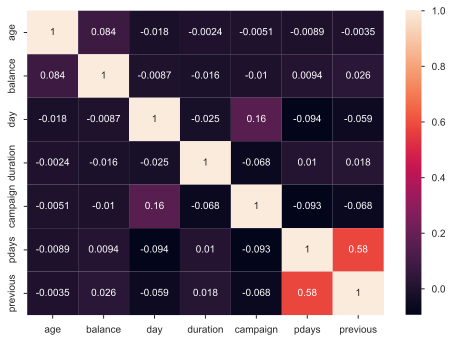

In [37]:
sns.heatmap(correlations_num, annot=True)

Variables 'pdays' and 'previous' have the strongest positive correlation. 
Strong correlations might cause the problem of multicolinearity in the further analysis if we decide to keep the highly-correlated variables in the model.  

## DATA PREPARATION

### Missing Values

From the data description, we know that the missing values are denoted as 'unknown', potentially as a result of an already applied constant imputer.  
We can count the percentages of the missing values for each of the columns and check whether any of them have a critically large proportion of the missing data and therefore need to be eliminated from the further analysis. 

In [38]:
total = df_train.isin(['unknown']).sum().sort_values(ascending=False)
percent = (df_train.isin(['unknown']).sum()/df_train.isin(['unknown']).count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
poutcome,3705,0.819509
contact,1324,0.292856
education,187,0.041363
job,38,0.008405
month,0,0.000000


Overall, the dataset does not contain large proportions of missing data.
- The only outstanding column is `poutcome` with the largest proportion of unknown values. As discussed above, this predictor should be removed due to little distinguishable information that can be used in the further analysis.
- We can safely remove the `contact` column since it has been seen during the analysis that the type of communication device does not influence the subscription rate. This means we are likely not to miss much of additional information when removing this predictor from the model.
- We as well remove all of the rows containing unknown values for `education` and `job` since it would be incorrect to input the mode value there due to the absence of significantly more frequent category in the respective columns.

In [39]:
#dropping poutcome and contact columns
df = df_train.drop((missing_data[missing_data['Percent'] > 0.20]).index,axis=1)

In [40]:
#dropping rows with unknown values of education and job columns
df = df.drop(df[(df['job']=='unknown')|(df['education']=='unknown')].index)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4311 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4311 non-null   int64 
 1   job        4311 non-null   object
 2   marital    4311 non-null   object
 3   education  4311 non-null   object
 4   default    4311 non-null   object
 5   balance    4311 non-null   int64 
 6   housing    4311 non-null   object
 7   loan       4311 non-null   object
 8   day        4311 non-null   int64 
 9   month      4311 non-null   object
 10  duration   4311 non-null   int64 
 11  campaign   4311 non-null   int64 
 12  pdays      4311 non-null   int64 
 13  previous   4311 non-null   int64 
 14  y          4311 non-null   object
dtypes: int64(7), object(8)
memory usage: 538.9+ KB


### Transformations

<Figure size 800x550 with 0 Axes>

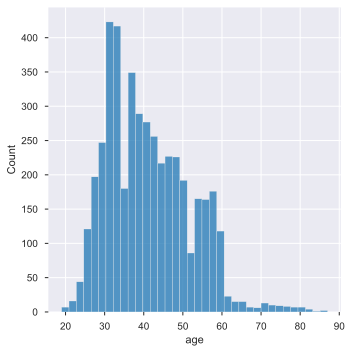

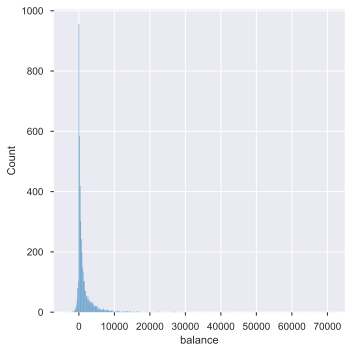

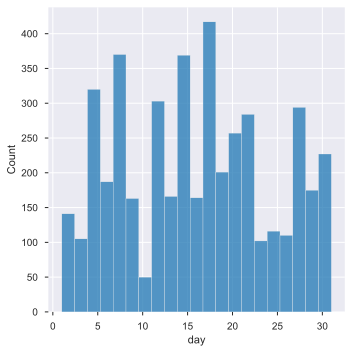

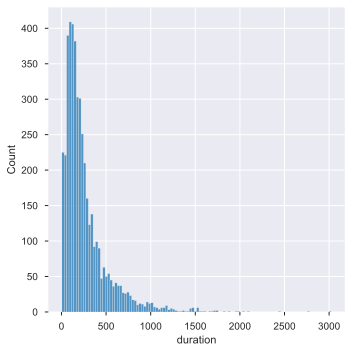

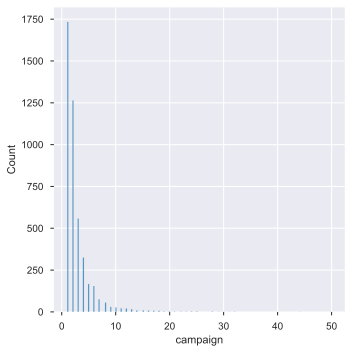

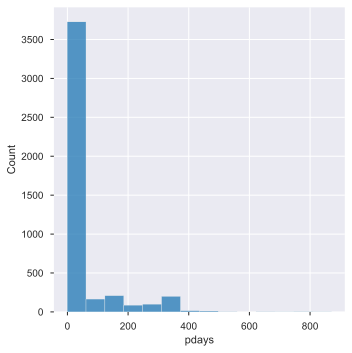

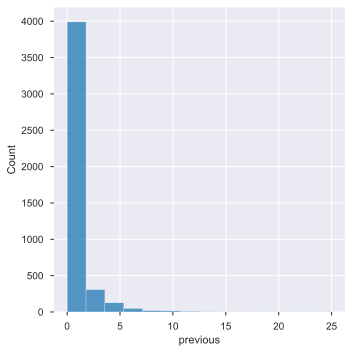

In [42]:
for i,var in enumerate(numerical_features):
    plt.figure(i)
    sns.displot(data=df_train, x=df_train[var])

- `day` variable seems to follow uniform distribution
- `age`, `balance`, `duration`, `campaign`, `pdays`, and `previous` are skewed to the left 

Do we need to transform the non-normal predictors? It depends on our aim. If our only aim is to predict the target variable, there is no need in the transformations. However, if we are aiming at identifying the most/least significant predictors, we would need correctly calculated confidence intervals that would require the predictors to be normally distributed as an underlying assumption for the intervals calculations.  

### Encoding

There are 7 categorical variables left to be encoded before further analysis:
- `job` - 
- `marital`
- `education`
- `default`
- `housing`
- `loan`
- `month`
- `y` - the target variable

Since there is a limited number of categories in each of the predictors, one-hot encoding is the best strategy. 

In [43]:
categorical_features_new = df.select_dtypes('object').drop('y', axis=1).columns

In [44]:
one_hot_encoder = OneHotEncoder()

ohe_categorical = one_hot_encoder.fit_transform(df[categorical_features_new])

In [45]:
pd.DataFrame(ohe_categorical.todense(), columns=one_hot_encoder.get_feature_names()).head()

,x0_admin.,x0_blue-collar,x0_entrepreneur,x0_housemaid,x0_management,x0_retired,x0_self-employed,x0_services,x0_student,x0_technician,...,x6_dec,x6_feb,x6_jan,x6_jul,x6_jun,x6_mar,x6_may,x6_nov,x6_oct,x6_sep
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## NOTES:
- Missing values were simply removed in this case. In other cases, an appropriate imputer could be applied
- When decided on the imputers and the required transformations, it is convenient to create pipelines for each type of predictors to combine all the data preprocessing steps